# Datathon Group 18

In [2]:
%%time
# Import the Pandas package
import pandas as pd
# Import the NumPy package
import numpy as np
# Import the Data functions
import data as d
# Import the DateTime functions
import datetime as DT

import geopandas as gp
import seaborn as sns
import matplotlib.pyplot as plt
import folium

from shapely.geometry import Polygon
from shapely.ops import nearest_points
from shapely.geometry import Point
from shapely.geometry import shape

CPU times: user 2.47 s, sys: 970 ms, total: 3.44 s
Wall time: 6.61 s


In [3]:
%%time
#Create a list of the files to work with
# lstFiles = ["uber_trips_2014.csv","uber_trips_2015.csv","green_trips.csv","yellow_trips.csv"]
# Load the files as a DataFrames

#lstDataFrames=[]

#Loading the trips dataframes

dfU14 = d.dataLoader("uber_trips_2014.csv")
dfU15 = d.dataLoader("uber_trips_2015.csv")
dfGC = d.dataLoader("green_trips.csv")
dfYC = d.dataLoader("yellow_trips.csv")

#Let's add symbols in case we want to merge and differentiate the registers by source
dfU14['Symbol'] = 'U14'
dfU15['Symbol'] = 'U15'
dfGC['Symbol'] = 'GCT'
dfYC['Symbol'] = 'YCT'


CPU times: user 45.7 s, sys: 4.32 s, total: 50 s
Wall time: 52.7 s


In [4]:
#%%time
#Load the dataframe with the MTA trips
#dfMTA = d.dataLoader('mta_trips.csv')
#dfMTA['Symbol'] = 'MTA'

In [225]:
%%time
#Loading the supplementary dataframes
dfDemo = d.dataLoader("demographics.csv")
dfGeo = d.dataLoader('geographic.csv')
dfZones = d.dataLoader('zones.csv')
dfWeather=d.dataLoader('weather.csv')

CPU times: user 167 ms, sys: 71.9 ms, total: 239 ms
Wall time: 297 ms


In [6]:
%%time
#Let's check what are the date ranges. Focused on the car sources
d.viewRange("--uber 2014--","pickup_datetime",dfU14)
d.viewRange("--uber 2015--","pickup_datetime",dfU15)
d.viewRange("--GC--","pickup_datetime",dfGC)
d.viewRange("--YC--","pickup_datetime",dfYC)

--uber 2014--
Min:4/1/14 0:00
Max:9/9/2014 9:59:00
--uber 2015--
Min:2015-01-01 00:00:05
Max:2015-06-30 23:59:00
--GC--
Min:2014-04-01 00:00:00
Max:2015-06-30 23:59:57
--YC--
Min:2014-04-01 00:00:00
Max:2015-06-30 23:59:59
CPU times: user 9.75 s, sys: 271 ms, total: 10 s
Wall time: 10.4 s


In [7]:
%%time
#IAM: fixing rogue dates in the Uber 2014 dataframe
dfU14['pickup_datetime'] = pd.to_datetime(dfU14['pickup_datetime'], infer_datetime_format=True)

CPU times: user 39.7 s, sys: 361 ms, total: 40.1 s
Wall time: 41.8 s


In [8]:
%%time
#We create date and hour columns for the different Dataframes as a way to be able to group the data at a later stage
dfU14['HOUR'] = pd.DatetimeIndex(dfU14['pickup_datetime']).hour
dfU14['DATE'] = pd.DatetimeIndex(dfU14['pickup_datetime']).date

dfU15['HOUR'] = pd.DatetimeIndex(dfU15['pickup_datetime']).hour
dfU15['DATE'] = pd.DatetimeIndex(dfU15['pickup_datetime']).date

dfGC['HOUR'] = pd.DatetimeIndex(dfGC['pickup_datetime']).hour
dfGC['DATE'] = pd.DatetimeIndex(dfGC['pickup_datetime']).date

dfYC['HOUR'] = pd.DatetimeIndex(dfYC['pickup_datetime']).hour
dfYC['DATE'] = pd.DatetimeIndex(dfYC['pickup_datetime']).date

CPU times: user 23.8 s, sys: 719 ms, total: 24.5 s
Wall time: 24 s


In [9]:
%%time
#Now the different data structures are visualized to see what datatypes are used in order to compare apples with apples
print(dfDemo.info())
print(dfDemo.describe())
print("null values demographics: \n ")
print(dfDemo.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 33 columns):
nta_name            188 non-null object
borough             188 non-null object
nta_code            188 non-null object
population          188 non-null int64
under_5_years       188 non-null int64
5-9_years           188 non-null int64
10-14_years         188 non-null int64
15-19_years         188 non-null int64
20-24_years         188 non-null int64
25-29_years         188 non-null int64
30-34_years         188 non-null int64
35-39_years         188 non-null int64
40-44_years         188 non-null int64
45-49_years         188 non-null int64
50-54_years         188 non-null int64
55-59_years         188 non-null int64
60-64_years         188 non-null int64
over_65_years       188 non-null int64
median_age          188 non-null int64
people_per_acre     188 non-null float64
households          188 non-null int64
less_than_10,000    188 non-null int64
10000_to_14999      188 non-null

## Visualization

**Demographics**

In [10]:
#%%time
#Visualize different aspects from the Demographics data

#sns.boxplot(x=dfDemo['population'], color='lime')
#plt.xlabel('Population', fontsize=14)
#plt.show()

In [11]:
#%%time
#sns.boxplot(x=dfDemo['median_age'], color='lime')
#plt.xlabel('median_age', fontsize=14)
#plt.show()

In [12]:
#%%time
#sns.boxplot(x=dfDemo['people_per_acre'], color='lime')
#plt.xlabel('people_per_acre', fontsize=14)
#plt.show()

In [13]:
#%%time
#sns.boxplot(x=dfDemo['households'], color='lime')
#plt.xlabel('households', fontsize=14)
#plt.show()

In [14]:
#%%time
#sns.boxplot(x=dfDemo['median_income'], color='lime')
#plt.xlabel('median_income', fontsize=14)
#plt.show()

In [15]:
#%%time
#sns.boxplot(x=dfDemo['mean_income'], color='lime')
#plt.xlabel('mean_income', fontsize=14)
#plt.show()

CPU times: user 3.08 s, sys: 32.2 ms, total: 3.11 s
Wall time: 3.15 s


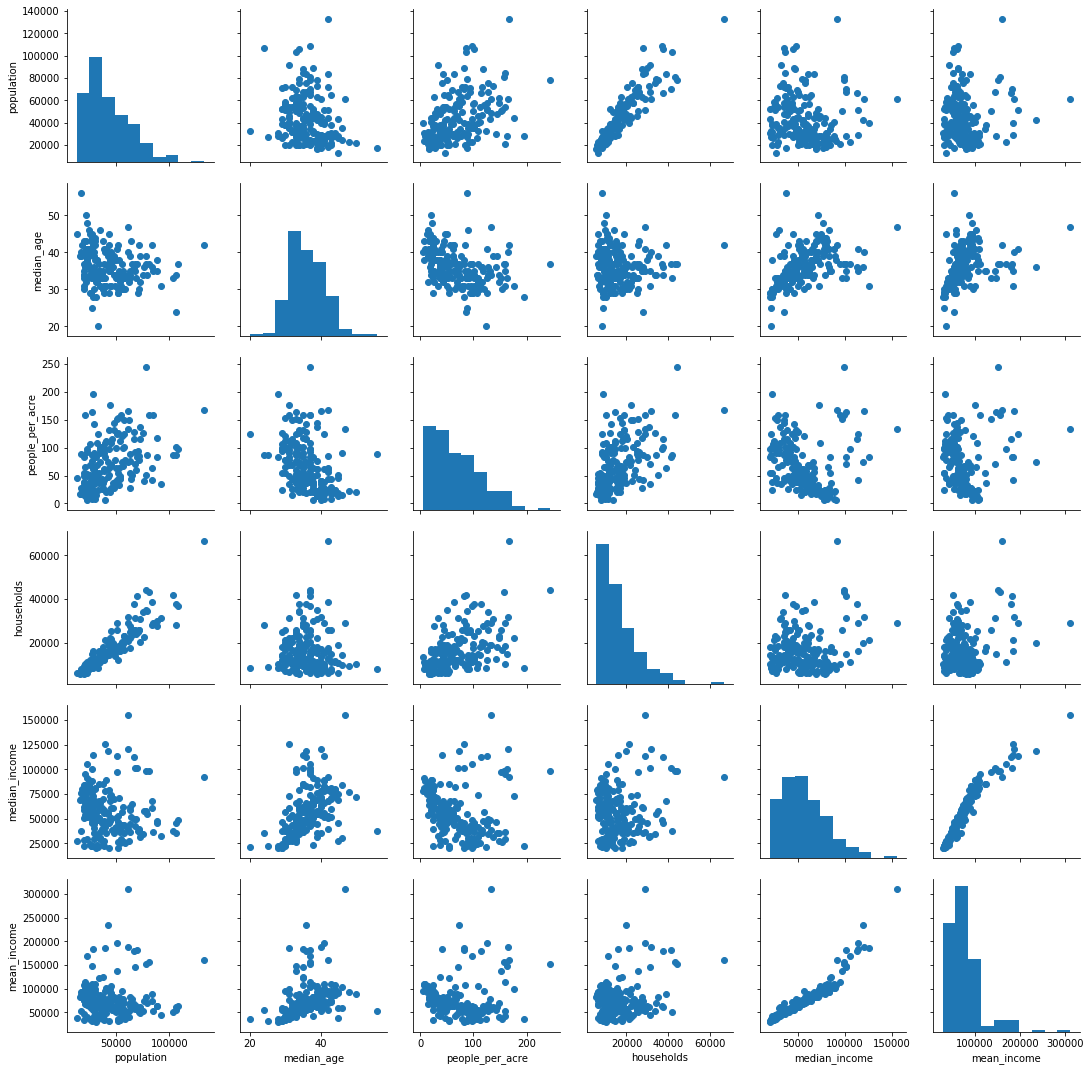

In [16]:
%%time
df_demographics_plot=dfDemo[['population','median_age','people_per_acre','households',
                                                    'median_income','mean_income']]
x=sns.PairGrid(df_demographics_plot)
x=x.map_diag(plt.hist)
x=x.map_offdiag(plt.scatter)

**Green cab trips**

In [17]:
print(dfGC.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589048 entries, 0 to 3589047
Data columns (total 12 columns):
pickup_datetime      object
dropoff_datetime     object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
trip_distance        float64
total_amount         float64
Symbol               object
TIME                 int64
DATE                 object
dtypes: float64(6), int64(2), object(4)
memory usage: 328.6+ MB
None


In [18]:
print(dfGC.describe())

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count      3.589048e+06     3.589048e+06       3.589048e+06      3.589048e+06   
mean      -7.381415e+01     4.068699e+01      -7.382658e+01      4.069179e+01   
std        2.976375e+00     1.641374e+00       2.812674e+00      1.550998e+00   
min       -1.223996e+02     0.000000e+00      -1.223996e+02      0.000000e+00   
25%       -7.395853e+01     4.070282e+01      -7.396718e+01      4.070625e+01   
50%       -7.394424e+01     4.074771e+01      -7.394400e+01      4.075044e+01   
75%       -7.391512e+01     4.080492e+01      -7.390833e+01      4.079577e+01   
max        0.000000e+00     4.278692e+01       0.000000e+00      4.316054e+01   

       passenger_count  trip_distance  total_amount          TIME  
count     3.589048e+06   3.589048e+06  3.589048e+06  3.589048e+06  
mean      1.404419e+00   2.949620e+00  1.478221e+01  1.359364e+01  
std       1.094672e+00   2.980152e+00  2.977614e+01  6.846637e+00 

In [19]:
print("null values in green cab trips: \n ")
print(dfGC.isna().sum())

null values in green cab trips: 
 
pickup_datetime      0
dropoff_datetime     0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
trip_distance        0
total_amount         0
Symbol               0
TIME                 0
DATE                 0
dtype: int64


In [20]:
#%%time
#sns.stripplot(x=dfGC['pickup_longitude'], color='black')
#plt.xlabel('pickup_longitude', fontsize=14)
#plt.show()

In [21]:
#%%time
#sns.stripplot(x=dfGC['pickup_latitude'], color='black')
#plt.xlabel('pickup_latitude', fontsize=14)
#plt.show()

In [22]:
#%%time
#sns.stripplot(x=dfGC['dropoff_longitude'], color='black')
#plt.xlabel('dropoff_longitude', fontsize=14)
#plt.show()

In [23]:
#%%time
#sns.stripplot(x=dfGC['dropoff_latitude'], color='black')
#plt.xlabel('dropoff_latitude', fontsize=14)
#plt.show()

In [24]:
#%%time
#sns.stripplot(x=dfGC['passenger_count'], color='black')
#plt.xlabel('passenger_count', fontsize=14)
#plt.show()

In [25]:
#%%time
#sns.stripplot(x=dfGC['trip_distance'], color='black')
#plt.xlabel('trip_distance', fontsize=14)
#plt.show()

In [26]:
#%%time
#sns.stripplot(x=dfGC['total_amount'], color='black')
#plt.xlabel('total_amount', fontsize=14)
#plt.show()

**Yellow cab trips**

In [27]:
print(dfYC.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7974059 entries, 0 to 7974058
Data columns (total 12 columns):
pickup_datetime      object
dropoff_datetime     object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
trip_distance        float64
total_amount         float64
Symbol               object
TIME                 int64
DATE                 object
dtypes: float64(6), int64(2), object(4)
memory usage: 730.0+ MB
None


In [28]:
print(dfYC.describe())

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
count      7.974059e+06     7.974059e+06       7.974059e+06      7.974059e+06   
mean      -7.244694e+01     3.990894e+01      -7.246507e+01      3.991985e+01   
std        1.052101e+01     5.796364e+00       1.046042e+01      5.763262e+00   
min       -1.800000e+02    -1.800000e+02      -7.364167e+02     -1.800000e+02   
25%       -7.399203e+01     4.073474e+01      -7.399137e+01      4.073344e+01   
50%       -7.398172e+01     4.075247e+01      -7.397979e+01      4.075291e+01   
75%       -7.396661e+01     4.076706e+01      -7.396233e+01      4.076824e+01   
max        1.720110e+02     6.220818e+01       1.720110e+02      4.043000e+02   

       passenger_count  trip_distance  total_amount          TIME  
count     7.974059e+06   7.974059e+06  7.974059e+06  7.974059e+06  
mean      1.688382e+00   1.659788e+01  1.560997e+01  1.352616e+01  
std       1.346068e+00   1.063671e+04  1.347520e+01  6.518469e+00 

In [29]:
print("null values in yellow cab trips: \n ")
print(dfYC.isna().sum())

null values in yellow cab trips: 
 
pickup_datetime      0
dropoff_datetime     0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
trip_distance        0
total_amount         0
Symbol               0
TIME                 0
DATE                 0
dtype: int64


In [30]:
#%%time
#sns.stripplot(x=dfYC['pickup_longitude'], color='black')
#plt.xlabel('pickup_longitude', fontsize=14)
#plt.show()

In [31]:
#%%time
#sns.stripplot(x=dfYC['pickup_latitude'], color='black')
#plt.xlabel('pickup_latitude', fontsize=14)
#plt.show()

In [32]:
#%%time
#sns.stripplot(x=dfYC['dropoff_longitude'], color='black')
#plt.xlabel('dropoff_longitude', fontsize=14)
#plt.show()

In [33]:
#%%time
#sns.stripplot(x=dfYC['dropoff_latitude'], color='black')
#plt.xlabel('dropoff_latitude', fontsize=14)
#plt.show()

In [34]:
#%%time
#sns.stripplot(x=dfYC['passenger_count'], color='black')
#plt.xlabel('passenger_count', fontsize=14)
#plt.show()

In [35]:
#%%time
#sns.stripplot(x=dfYC['trip_distance'], color='black')
#plt.xlabel('trip_distance', fontsize=14)
#plt.show()

In [36]:
#%%time
#sns.stripplot(x=dfYC['total_amount'], color='black')
#plt.xlabel('total_amount', fontsize=14)
#plt.show()

**Uber 2014 trips**

In [37]:
print(dfU14.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 7 columns):
pickup_datetime     datetime64[ns]
pickup_latitude     float64
pickup_longitude    float64
base                object
Symbol              object
TIME                int64
DATE                object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 242.2+ MB
None


In [38]:
print(dfU14.describe())

       pickup_latitude  pickup_longitude          TIME
count     4.534327e+06      4.534327e+06  4.534327e+06
mean      4.073926e+01     -7.397302e+01  1.421831e+01
std       3.994991e-02      5.726670e-02  5.958759e+00
min       3.965690e+01     -7.492900e+01  0.000000e+00
25%       4.072110e+01     -7.399650e+01  1.000000e+01
50%       4.074220e+01     -7.398340e+01  1.500000e+01
75%       4.076100e+01     -7.396530e+01  1.900000e+01
max       4.211660e+01     -7.206660e+01  2.300000e+01


In [39]:
print("null values in uber trips - 2014: \n ")
print(dfU14.isna().sum())

null values in uber trips - 2014: 
 
pickup_datetime     0
pickup_latitude     0
pickup_longitude    0
base                0
Symbol              0
TIME                0
DATE                0
dtype: int64


In [40]:
#%%time
#sns.stripplot(x=dfU14['pickup_latitude'], color='black')
#plt.xlabel('pickup_latitude', fontsize=14)
#plt.show()

In [41]:
#%%time
#sns.stripplot(x=dfU14['pickup_longitude'], color='black')
#plt.xlabel('pickup_longitude', fontsize=14)
#plt.show()

**Uber 2015 trips**

In [42]:
print(dfU15.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 7 columns):
pickup_datetime       object
pickup_location_id    int64
dispatch_base         object
affiliate_base        object
Symbol                object
TIME                  int64
DATE                  object
dtypes: int64(2), object(5)
memory usage: 762.1+ MB
None


In [43]:
print(dfU15.describe())

       pickup_location_id          TIME
count        1.427048e+07  1.427048e+07
mean         1.520574e+02  1.409316e+01
std          7.159620e+01  6.623962e+00
min          1.000000e+00  0.000000e+00
25%          9.200000e+01  9.000000e+00
50%          1.570000e+02  1.600000e+01
75%          2.300000e+02  2.000000e+01
max          2.650000e+02  2.300000e+01


In [44]:
print("null values in uber trips - 2015: \n ")
print(dfU15.isna().sum())

null values in uber trips - 2015: 
 
pickup_datetime            0
pickup_location_id         0
dispatch_base              0
affiliate_base        162195
Symbol                     0
TIME                       0
DATE                       0
dtype: int64


In [45]:
#%%time
#sns.stripplot(x=dfU15['pickup_location_id'], color='black')
#plt.xlabel('pickup_location_id', fontsize=14)
#plt.show()

#### Transform dataframes into geopandas

In [46]:
dfGeo.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [47]:
%%time
dicGeo = {}
## Connvert into polygons geodataframe

for i in dfGeo.columns:
   temp = dfGeo[[i]].copy()
   temp['geo']=np.where(temp.index % 2 != 0,'lon','lat')
   temp.dropna(inplace=True)
   temp_lon = temp.loc[temp.geo=='lon',i].copy()
   temp_lat = temp.loc[temp.geo=='lat',i].copy()
   dicGeo[i] = Polygon(zip(temp_lat.values,temp_lon.values))
dfGeo2 = pd.DataFrame.from_dict(dicGeo,orient='index').reset_index(drop=False)
dfGeo2.columns = ['location_id','polygon']
dfGeo2.head()


CPU times: user 2.91 s, sys: 95.4 ms, total: 3 s
Wall time: 3.94 s


,location_id,polygon
0,BK88,"POLYGON ((-73.9760507905698 40.6312841471042, ..."
1,QN52,"POLYGON ((-73.79493384594591 40.7578063026709,..."
2,QN48,"POLYGON ((-73.7757397458527 40.7433339175923, ..."
3,QN51,"POLYGON ((-73.8037916164017 40.7756183875692, ..."
4,QN27,"POLYGON ((-73.86109864852619 40.7636727485249,..."


In [48]:
dfGeo2.set_index('location_id')

,polygon
location_id,
BK88,"POLYGON ((-73.9760507905698 40.6312841471042, ..."
QN52,"POLYGON ((-73.79493384594591 40.7578063026709,..."
QN48,"POLYGON ((-73.7757397458527 40.7433339175923, ..."
QN51,"POLYGON ((-73.8037916164017 40.7756183875692, ..."
QN27,"POLYGON ((-73.86109864852619 40.7636727485249,..."
...,...
MN32,"POLYGON ((-73.9380478369022 40.7808378163815, ..."
MN33,"POLYGON ((-73.9350544306231 40.7916954772443, ..."
MN99,"POLYGON ((-74.010929861053 40.684499723222, -7..."


In [49]:
%%time
dfPolygon = gp.GeoDataFrame(dfGeo2, geometry='polygon', crs={'init': 'epsg:4326'})
dfPolygon.head()

CPU times: user 3.14 ms, sys: 2.09 ms, total: 5.23 ms
Wall time: 5.07 ms


,location_id,polygon
0,BK88,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,QN52,"POLYGON ((-73.79493 40.75781, -73.79475 40.755..."
2,QN48,"POLYGON ((-73.77574 40.74333, -73.77580 40.743..."
3,QN51,"POLYGON ((-73.80379 40.77562, -73.80099 40.775..."
4,QN27,"POLYGON ((-73.86110 40.76367, -73.85993 40.762..."


In [50]:
def addNTA(df, dfPoly):
    lstGeometry = [Point(xy) for xy in zip(df.pickup_longitude, df.pickup_latitude)]
    dfPoints = gp.GeoDataFrame(df, geometry=lstGeometry, crs={'init': 'epsg:4326'})
    dfNTA = gp.sjoin(dfPoints, dfPoly, how="left", op='within')

    return dfNTA

In [51]:
#%%time
#lstGeometry = [Point(xy) for xy in zip(dfU14.pickup_longitude, dfU14.pickup_latitude)]
#dfPoints = gp.GeoDataFrame(dfU14, geometry=lstGeometry, crs={'init': 'epsg:4326'})


In [52]:
#%%time
#dfU14NTA = gp.sjoin(dfPoints, dfZones, how="left", op='within')
#dfU14NTA.head()

In [53]:
%%time
dfU14NTA = addNTA(dfU14, dfPolygon)
dfU14NTA.head()

CPU times: user 9min 13s, sys: 13.2 s, total: 9min 27s
Wall time: 10min 33s


,pickup_datetime,pickup_latitude,pickup_longitude,base,Symbol,TIME,DATE,geometry,index_right,location_id
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,U14,0,2014-04-01,POINT (-73.95490 40.76900),NaN,NaN
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,U14,0,2014-04-01,POINT (-74.03450 40.72670),NaN,NaN
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,U14,0,2014-04-01,POINT (-73.98730 40.73160),150.0,MN22
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,U14,0,2014-04-01,POINT (-73.97760 40.75880),14.0,MN17
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,U14,0,2014-04-01,POINT (-73.97220 40.75940),15.0,MN19


In [54]:
%%time
dfGCNTA = addNTA(dfGC, dfPolygon)
dfGCNTA.head()

CPU times: user 6min 53s, sys: 11.1 s, total: 7min 4s
Wall time: 7min 19s


,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,Symbol,TIME,DATE,geometry,index_right,location_id
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8,GCT,1,2015-02-01,POINT (-73.95354 40.81117),148.0,MN09
1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.8,GCT,20,2015-01-02,POINT (-73.94671 40.71432),59.0,BK90
2,2014-09-27 17:55:38,2014-09-27 18:19:56,-73.957626,40.718094,-73.947304,40.777813,5,6.12,26.3,GCT,17,2014-09-27,POINT (-73.95763 40.71809),135.0,BK73
3,2014-04-27 02:27:04,2014-04-27 02:39:02,-73.949501,40.713997,-73.987785,40.718582,2,3.68,17.3,GCT,2,2014-04-27,POINT (-73.94950 40.71400),135.0,BK73
4,2014-05-26 18:32:19,2014-05-26 18:44:13,-73.944092,40.672195,-73.977325,40.664013,1,2.40,11.5,GCT,18,2014-05-26,POINT (-73.94409 40.67220),66.0,BK61


In [55]:
%%time
dfYCNTA = addNTA(dfYC, dfPolygon)
dfYCNTA.head()

CPU times: user 14min 38s, sys: 34.5 s, total: 15min 12s
Wall time: 15min 36s


,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,Symbol,TIME,DATE,geometry,index_right,location_id
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1,8.70,34.8,YCT,18,2014-04-03,POINT (-74.00603 40.70628),NaN,NaN
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1,9.37,30.0,YCT,15,2014-04-16,POINT (-73.97956 40.74936),63.0,MN20
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1,0.89,6.5,YCT,18,2014-04-13,POINT (-73.95645 40.77531),NaN,NaN
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1,2.40,12.5,YCT,19,2014-05-21,POINT (-73.98721 40.75785),14.0,MN17
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3,5.58,24.5,YCT,16,2014-05-30,POINT (-73.97429 40.75540),15.0,MN19


In [56]:
dfU14NTA.columns

Index(['pickup_datetime', 'pickup_latitude', 'pickup_longitude', 'base',
       'Symbol', 'TIME', 'DATE', 'geometry', 'index_right', 'location_id'],
      dtype='object')

In [57]:
dfU15.columns

Index(['pickup_datetime', 'pickup_location_id', 'dispatch_base',
       'affiliate_base', 'Symbol', 'TIME', 'DATE'],
      dtype='object')

In [58]:
dfGCNTA.columns

Index(['pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance', 'total_amount', 'Symbol', 'TIME',
       'DATE', 'geometry', 'index_right', 'location_id'],
      dtype='object')

In [59]:
dfYCNTA.columns

Index(['pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'trip_distance', 'total_amount', 'Symbol', 'TIME',
       'DATE', 'geometry', 'index_right', 'location_id'],
      dtype='object')

In [60]:
%%time
#dfU14NTA.to_csv(d.strPath + 'dfU14NTA.csv')
#dfU15.to_csv(d.strPath + 'dfU15.csv')
#dfGCNTA.to_csv(d.strPath + 'dfGCNTA.csv')
#dfYCNTA.to_csv(d.strPath + 'dfYCNTA.csv')

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.9 µs


Now we can use the common columns in every dataframe to create an homogeneus Car Trips dataframe.

In [62]:
dfU15.head()

,pickup_datetime,pickup_location_id,dispatch_base,affiliate_base,Symbol,TIME,DATE
0,2015-05-17 09:47:00,141,B02617,B02617,U15,9,2015-05-17
1,2015-05-17 09:47:00,65,B02617,B02617,U15,9,2015-05-17
2,2015-05-17 09:47:00,100,B02617,B02617,U15,9,2015-05-17
3,2015-05-17 09:47:00,80,B02617,B02774,U15,9,2015-05-17
4,2015-05-17 09:47:00,90,B02617,B02617,U15,9,2015-05-17


In [63]:
%%time
dfZones.head()

CPU times: user 423 µs, sys: 118 µs, total: 541 µs
Wall time: 489 µs


,location_id,borough,zone,service_zone,nta_code
0,1,EWR,Newark Airport,EWR,NJ01
1,2,Queens,Jamaica Bay,Boro Zone,QN61
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31
3,4,Manhattan,Alphabet City,Yellow Zone,MN22
4,5,Staten Island,Arden Heights,Boro Zone,SI48


In [64]:
def getNTA(LocationID):
    obj = dfZones[dfZones['location_id']==LocationID]['nta_code']
    #print(type(obj))
    if len(obj.values) == 0:
        #print(obj)
        return None
    else:
        return obj.values[0]

#getNTA(141)

In [110]:
%%time
sU15NTA = dfU15.merge(dfZones, left_on = 'pickup_location_id', right_on = 'location_id', how = 'left', indicator = True)
#dfU15['location_id'] = dfU15.apply(lambda x:getNTA(x.pickup_location_id),axis=1)

CPU times: user 23.5 s, sys: 9.02 s, total: 32.5 s
Wall time: 32.7 s


,pickup_datetime,pickup_location_id,dispatch_base,affiliate_base,Symbol,TIME,DATE,location_id,borough,zone,service_zone,nta_code,_merge
0,2015-05-17 09:47:00,141,B02617,B02617,U15,9,2015-05-17,141.0,Manhattan,Lenox Hill West,Yellow Zone,MN31,both
1,2015-05-17 09:47:00,65,B02617,B02617,U15,9,2015-05-17,65.0,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,BK38,both
2,2015-05-17 09:47:00,100,B02617,B02617,U15,9,2015-05-17,100.0,Manhattan,Garment District,Yellow Zone,MN13,both
3,2015-05-17 09:47:00,80,B02617,B02774,U15,9,2015-05-17,80.0,Brooklyn,East Williamsburg,Boro Zone,BK90,both
4,2015-05-17 09:47:00,90,B02617,B02617,U15,9,2015-05-17,90.0,Manhattan,Flatiron,Yellow Zone,MN13,both


In [164]:
%%time
dfU15NTA = pd.DataFrame(sU15NTA)
dfU15NTA.head()

,pickup_datetime,pickup_location_id,dispatch_base,affiliate_base,Symbol,TIME,DATE,location_id,borough,zone,service_zone,nta_code,_merge
0,2015-05-17 09:47:00,141,B02617,B02617,U15,9,2015-05-17,141.0,Manhattan,Lenox Hill West,Yellow Zone,MN31,both
1,2015-05-17 09:47:00,65,B02617,B02617,U15,9,2015-05-17,65.0,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,BK38,both
2,2015-05-17 09:47:00,100,B02617,B02617,U15,9,2015-05-17,100.0,Manhattan,Garment District,Yellow Zone,MN13,both
3,2015-05-17 09:47:00,80,B02617,B02774,U15,9,2015-05-17,80.0,Brooklyn,East Williamsburg,Boro Zone,BK90,both
4,2015-05-17 09:47:00,90,B02617,B02617,U15,9,2015-05-17,90.0,Manhattan,Flatiron,Yellow Zone,MN13,both


In [121]:
type(dfU14NTA)

geopandas.geodataframe.GeoDataFrame

In [131]:
%%time
A = pd.DataFrame(dfU14NTA.drop(columns={'pickup_latitude','pickup_longitude','base','index_right','geometry'}))
A.head()

,pickup_datetime,Symbol,TIME,DATE,location_id
0,2014-04-01 00:11:00,U14,0,2014-04-01,NaN
1,2014-04-01 00:17:00,U14,0,2014-04-01,NaN
2,2014-04-01 00:21:00,U14,0,2014-04-01,MN22
3,2014-04-01 00:28:00,U14,0,2014-04-01,MN17
4,2014-04-01 00:33:00,U14,0,2014-04-01,MN19


In [136]:
%%time
B = pd.DataFrame(dfGCNTA.drop(columns={'dropoff_datetime','dropoff_longitude','dropoff_latitude','passenger_count','trip_distance','total_amount','pickup_latitude','pickup_longitude','index_right','geometry'}))
B.head()

,pickup_datetime,Symbol,TIME,DATE,location_id
0,2015-02-01 01:26:45,GCT,1,2015-02-01,MN09
1,2015-01-02 20:06:28,GCT,20,2015-01-02,BK90
2,2014-09-27 17:55:38,GCT,17,2014-09-27,BK73
3,2014-04-27 02:27:04,GCT,2,2014-04-27,BK73
4,2014-05-26 18:32:19,GCT,18,2014-05-26,BK61


In [172]:
%%time
C = pd.DataFrame(dfYCNTA.drop(columns={'dropoff_datetime','dropoff_longitude','dropoff_latitude','passenger_count','trip_distance','total_amount','pickup_latitude','pickup_longitude','index_right','geometry'}))
C.head()

CPU times: user 623 ms, sys: 2.85 s, total: 3.47 s
Wall time: 7.49 s


,pickup_datetime,Symbol,TIME,DATE,location_id
0,2014-04-03 18:28:10,YCT,18,2014-04-03,NaN
1,2014-04-16 15:42:00,YCT,15,2014-04-16,MN20
2,2014-04-13 18:04:00,YCT,18,2014-04-13,NaN
3,2014-05-21 19:33:00,YCT,19,2014-05-21,MN17
4,2014-05-30 16:28:00,YCT,16,2014-05-30,MN19


In [160]:
%%time
D = pd.DataFrame(dfU15NTA.drop(columns={'pickup_location_id','dispatch_base','affiliate_base','location_id','borough','zone','service_zone','_merge'}))
D.rename(columns={"nta_code":"location_id"},inplace=True)
D.head()

CPU times: user 2.63 s, sys: 742 ms, total: 3.37 s
Wall time: 3.69 s


,pickup_datetime,Symbol,TIME,DATE,location_id
0,2015-05-17 09:47:00,U15,9,2015-05-17,MN31
1,2015-05-17 09:47:00,U15,9,2015-05-17,BK38
2,2015-05-17 09:47:00,U15,9,2015-05-17,MN13
3,2015-05-17 09:47:00,U15,9,2015-05-17,BK90
4,2015-05-17 09:47:00,U15,9,2015-05-17,MN13


In [175]:
%%time
lstDF = [A,B,C,D]
dfCarTrips=pd.concat(lstDF,ignore_index=True, sort=False)
print(dfCarTrips.isna().sum())

pickup_datetime          0
Symbol                   0
TIME                     0
DATE                     0
location_id        2274214
dtype: int64
CPU times: user 24.4 s, sys: 3.57 s, total: 28 s
Wall time: 28.7 s


In [201]:
%%time
dfCarTrips.rename(columns={"location_id":"nta_code"},inplace=True)

CPU times: user 4.11 s, sys: 1.51 s, total: 5.62 s
Wall time: 5.77 s


In [202]:
%%time
dfCarTrips.dropna(inplace=True)
print(dfCarTrips.isna().sum())

pickup_datetime    0
Symbol             0
TIME               0
DATE               0
nta_code           0
dtype: int64
CPU times: user 14.4 s, sys: 2.11 s, total: 16.5 s
Wall time: 19.7 s


In [203]:
%%time
dfCarTrips.groupby(['Symbol','nta_code','DATE','HOUR'])

CPU times: user 1.61 ms, sys: 3.27 ms, total: 4.88 ms
Wall time: 12.2 ms


In [204]:
%%time
dfCarsVSDemo = dfCarTrips.merge(dfDemo, left_on = 'nta_code', right_on = 'nta_code', how = 'left')
dfCarsVSDemo.head()

CPU times: user 20.7 s, sys: 31.8 s, total: 52.5 s
Wall time: 1min 17s


,pickup_datetime,Symbol,TIME,DATE,nta_code,nta_name,borough,population,under_5_years,5-9_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,2014-04-01 00:21:00,U14,0,2014-04-01,MN22,East Village,Manhattan,44136.0,862.0,617.0,...,2072.0,1524.0,1702.0,3160.0,3057.0,3201.0,2155.0,2478.0,72665.0,100130.0
1,2014-04-01 00:28:00,U14,0,2014-04-01,MN17,Midtown-Midtown South,Manhattan,28630.0,819.0,408.0,...,927.0,766.0,1165.0,1107.0,1119.0,2390.0,1778.0,4513.0,114491.0,184315.0
2,2014-04-01 00:33:00,U14,0,2014-04-01,MN19,Turtle Bay-East Midtown,Manhattan,51231.0,1849.0,1076.0,...,1664.0,932.0,1975.0,3140.0,3345.0,5214.0,2669.0,8156.0,113998.0,196721.0
3,2014-04-01 00:39:00,U14,0,2014-04-01,MN27,Chinatown,Manhattan,47844.0,1807.0,1802.0,...,2849.0,1399.0,1841.0,2430.0,1661.0,1585.0,630.0,940.0,35908.0,62270.0
4,2014-04-01 00:45:00,U14,0,2014-04-01,MN17,Midtown-Midtown South,Manhattan,28630.0,819.0,408.0,...,927.0,766.0,1165.0,1107.0,1119.0,2390.0,1778.0,4513.0,114491.0,184315.0


In [246]:
dfCarsVSDemo.columns

Index(['pickup_datetime', 'Symbol', 'TIME', 'DATE', 'nta_code', 'nta_name',
       'borough', 'population', 'under_5_years', '5-9_years', '10-14_years',
       '15-19_years', '20-24_years', '25-29_years', '30-34_years',
       '35-39_years', '40-44_years', '45-49_years', '50-54_years',
       '55-59_years', '60-64_years', 'over_65_years', 'median_age',
       'people_per_acre', 'households', 'less_than_10,000', '10000_to_14999',
       '15000_to_24999', '25000_to_34999', '35000_to_49999', '50000_to_74999',
       '75000_to_99999', '100000_to_149999', '150000_to_199999',
       '200000_or_more', 'median_income', 'mean_income'],
      dtype='object')

In [245]:
%%time
dfCarsVSDemo.isna().sum()

CPU times: user 12 s, sys: 14.5 s, total: 26.4 s
Wall time: 30.1 s


pickup_datetime          0
Symbol                   0
TIME                     0
DATE                     0
nta_code                 0
nta_name            611739
borough             611739
population          611739
under_5_years       611739
5-9_years           611739
10-14_years         611739
15-19_years         611739
20-24_years         611739
25-29_years         611739
30-34_years         611739
35-39_years         611739
40-44_years         611739
45-49_years         611739
50-54_years         611739
55-59_years         611739
60-64_years         611739
over_65_years       611739
median_age          611739
people_per_acre     611739
households          611739
less_than_10,000    611739
10000_to_14999      611739
15000_to_24999      611739
25000_to_34999      611739
35000_to_49999      611739
50000_to_74999      611739
75000_to_99999      611739
100000_to_149999    611739
150000_to_199999    611739
200000_or_more      611739
median_income       611739
mean_income         611739
d

In [240]:
%%time
dfCorr = dfCarsVSDemo.corr()

CPU times: user 1min 1s, sys: 29.9 s, total: 1min 31s
Wall time: 1min 44s


In [242]:
dfCorr.columns

Index(['TIME', 'population', 'under_5_years', '5-9_years', '10-14_years',
       '15-19_years', '20-24_years', '25-29_years', '30-34_years',
       '35-39_years', '40-44_years', '45-49_years', '50-54_years',
       '55-59_years', '60-64_years', 'over_65_years', 'median_age',
       'people_per_acre', 'households', 'less_than_10,000', '10000_to_14999',
       '15000_to_24999', '25000_to_34999', '35000_to_49999', '50000_to_74999',
       '75000_to_99999', '100000_to_149999', '150000_to_199999',
       '200000_or_more', 'median_income', 'mean_income'],
      dtype='object')

CPU times: user 206 ms, sys: 280 ms, total: 486 ms
Wall time: 972 ms


Text(0.5, 1, 'Correlation Matrix')

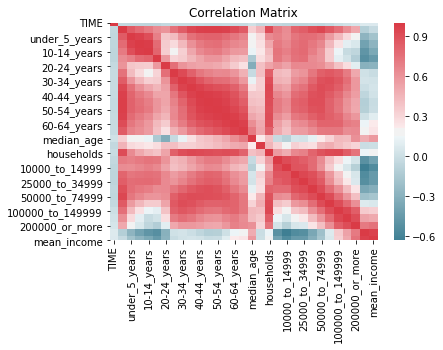

In [241]:
%%time
sns.heatmap(dfCorr,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix")

In [226]:
%%time
dfWeather['location'].unique()

CPU times: user 667 µs, sys: 9 µs, total: 676 µs
Wall time: 684 µs


array(['JFK', 'LGA', 'Central Park'], dtype=object)

In [229]:
dfWeather['dateS'] = pd.DatetimeIndex(dfWeather['date']).date

In [231]:
%%time
dfWeather['dateS'].min()

CPU times: user 591 µs, sys: 10 µs, total: 601 µs
Wall time: 650 µs


datetime.date(2014, 1, 1)

In [237]:
%%time
dfWeather['dateS'].max()

CPU times: user 782 µs, sys: 29 µs, total: 811 µs
Wall time: 961 µs


datetime.date(2015, 12, 31)

In [238]:
%%time
dfWeather[dfWeather['date']=='12/31/15']

CPU times: user 1.61 ms, sys: 504 µs, total: 2.11 ms
Wall time: 2.71 ms


,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,dateS
729,12/31/15,52,43,47.5,0.06,0,0,JFK,40.647490,-73.779982,2015-12-31
1459,12/31/15,50,43,46.5,0.03,0,0,LGA,40.776927,-73.873966,2015-12-31
2189,12/31/15,48,42,45.0,0.03,0,0,Central Park,40.771133,-73.974187,2015-12-31


In [189]:
dfZones.head()

,location_id,borough,zone,service_zone,nta_code
0,1,EWR,Newark Airport,EWR,NJ01
1,2,Queens,Jamaica Bay,Boro Zone,QN61
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31
3,4,Manhattan,Alphabet City,Yellow Zone,MN22
4,5,Staten Island,Arden Heights,Boro Zone,SI48


**MTA data**

In [ ]:
#print(dfMTA.info())

In [ ]:
#print(dfMTA.describe())

In [ ]:
#print("null values in MTA data: \n ")
#print(dfMTA.isna().sum())

In [ ]:
#%%time
#sns.stripplot(x=dfMTA['new_entries'], color='black')
#plt.xlabel('new_entries', fontsize=14)
#plt.show()

In [ ]:
#%%time
#sns.stripplot(x=dfMTA['new_exits'], color='black')
#plt.xlabel('new_exits', fontsize=14)
#plt.show()

In [ ]:
#%%time
#sns.stripplot(x=dfMTA['latitude'], color='black')
#plt.xlabel('latitude', fontsize=14)
#plt.show()

In [ ]:
#%%time
#sns.stripplot(x=dfMTA['longitude'], color='black')
#plt.xlabel('longitude', fontsize=14)
#plt.show()